# Network Formation Models

In [2]:
%%capture
# Housekeeping
import networkx as nx
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl
import random as rn

# Make sure you download econ46_library.py from our course material and save it in the same folder as then notebooks
# this file has some functions specifically coded for the class
from supporting_material import econ46_library as el

# These modules are only to have some interactive pieces of code in the notebooks
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

As you saw in class, if we start to model the formation of the networks in more detail, we can capture some features from "real" networks that were not perfectly represented by the Erdos-Renyi random network model.


In this notebook you can see some of the models discussed in class.

Once you have created the networks you can apply functions from previous notebooks to study the properties of the networks or simulate contagions.



## Stochastic Block Model

Following the same principle as the random network model but we allow nodes to be of a certain type. The probability of a link between nodes vary within and across types.

With the function below you can generate a quick and simple stochastic model with up to 8 types. If you want more control over the probabilities, use directly the function from networkx described below.

In [3]:
display(el.top_island,el.bot_island,el.lays_island,el.atts_island, el.y_island)

ToggleButtons(description='Layout:', options=('Circle', 'Kamada Kawai', 'Spring', 'Random'), tooltips=('Circul…

Dropdown(description='Attribute:', options=('', 'Degree Centrality', 'Clustering Centrality', 'Betweenness Cen…

Output()

In [2]:
# You can also use directly this course function
G0, blocks  = el.simple_random_block_graph(n1=5,n2=5,n3=5,n4=10,n5=4,
                     n6=3,n7=4,n8=7)

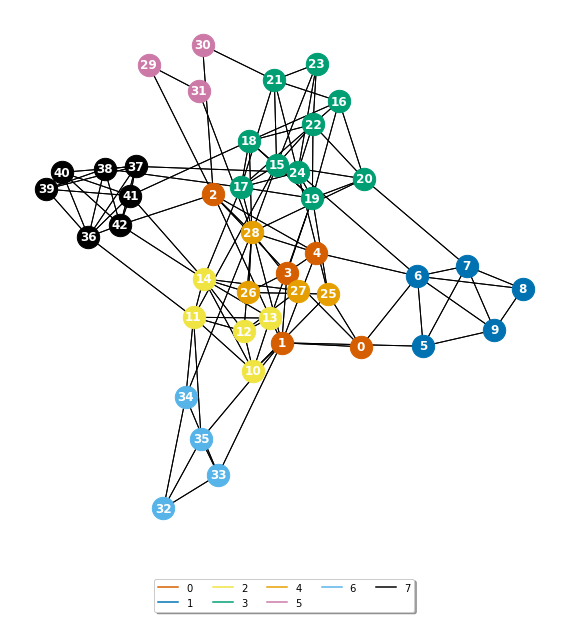

In [3]:
# This one allows you to plot up to 8 different colored groups:
el.plot_block_graph(G0,blocks)

In [4]:
# Generate a block model using nx function. 

# input a list of group sizes
# specify the probabilities of connection across groups with a list of lists p.
# note that if the network is undirected, the probabilities most be symmetric, 
# that is the probability of  links form group 0 to group 1 should be the same as the prob of links from 1 to 0
G1 = nx.stochastic_block_model(sizes=[10, 4, 4,8,4], p=[[.8,.1,.01,0.03,.02],
                                                  [.1,.79,.01,0.02,.01],
                                                  [0.01,.01,.8,.01,.01],
                                                  [0.03,.02,.01,.9,.1],
                                                  [0.02,.01,0.01,0.1,.89]],seed=987786)



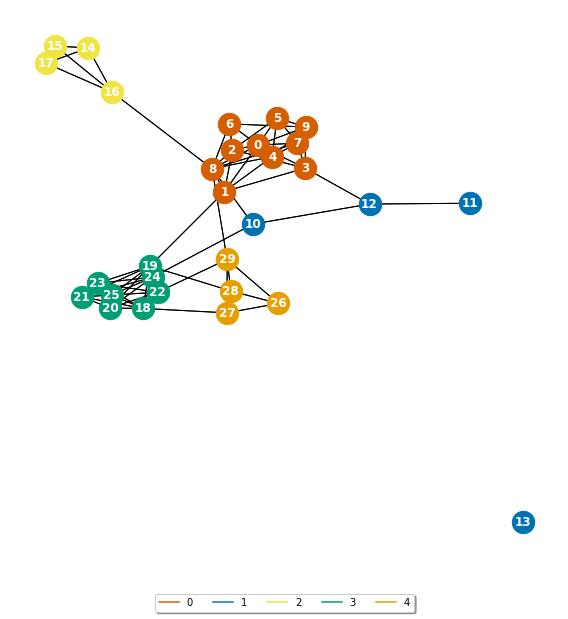

In [5]:
# You can still use the same plotting function:
el.plot_block_graph(G1,'block')

## Rewired Lattice

The function below allows you to create a ring lattice in which every node is connected to k closest neighbors and then theres a probability p that the edge is rewired to a random node in the network.

In [6]:
G_ws = nx.watts_strogatz_graph(20,k=4,p=0.1,seed=65489)


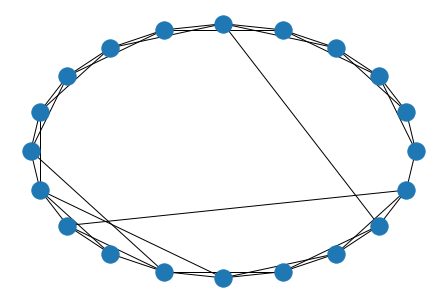

In [7]:
nx.draw_circular(G_ws)


In [8]:
# To add links instead of rewiring use:
G_nws = nx.newman_watts_strogatz_graph(20,k=4,p=0.1,seed=65489)


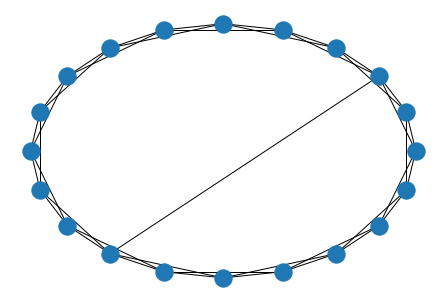

In [9]:
nx.draw_circular(G_nws)


# Random Uniform
- New node forms m links to existing nodes (if can).
- An existing node has a probability m/t of getting new link in period t.
- No longer binomial, as probabilities vary with time.


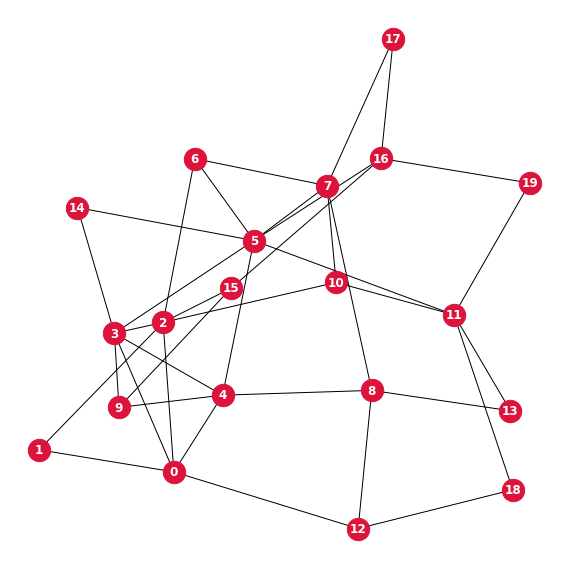

In [10]:
N = 20
m = 2

# Start with m nodes all friends with each other to initialize the process.
G_u = el.g_uniform(N,m)

    
el.plot_simple_graph(G_u) 


## Preferential attachment
- Start with a simple benchmark model
- Each date a new node is born
- Forms m links to existing nodes 
- Each node is chosen with probability proportional to its degree.


In [28]:
N = 20
m = 2

G_ba = nx.barabasi_albert_graph(N,m,seed=65489)


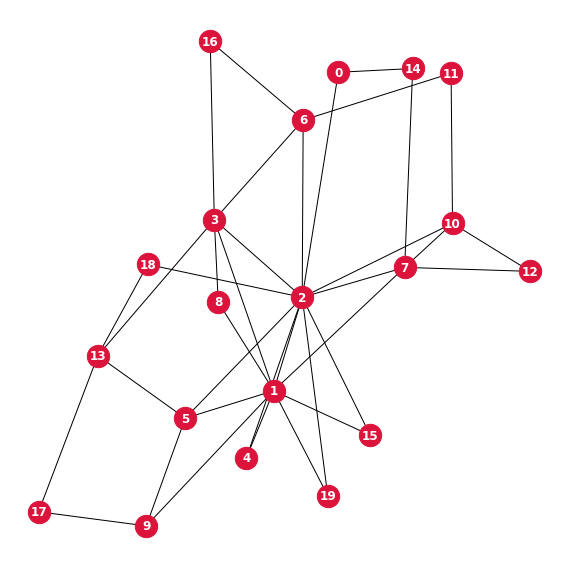

In [29]:
el.plot_simple_graph(G_ba)


## Hybrid uniform/preferential attachment

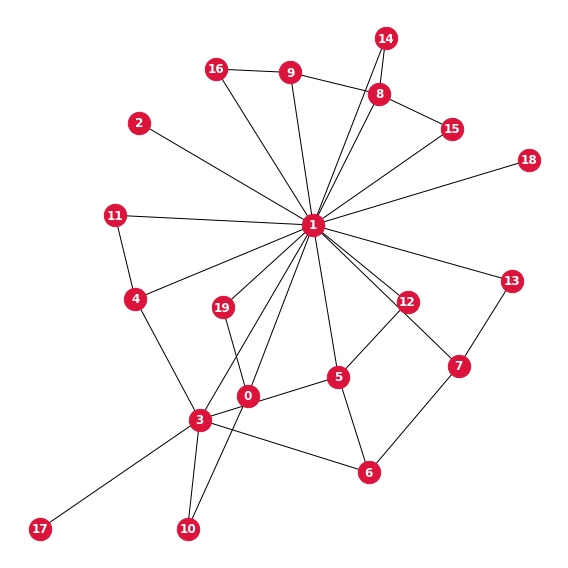

In [22]:
N = 20
m = 2
a = .5

G_h = el.g_hybrid(N,m,a)

el.plot_simple_graph(G_h)


## Meeting people through the network

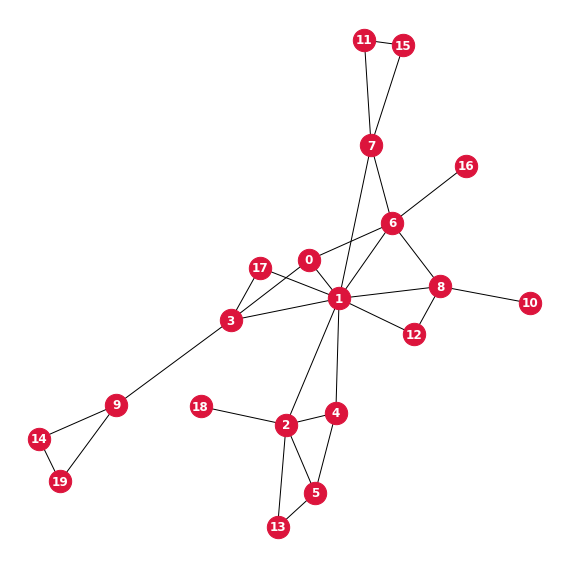

In [23]:
N = 20
m = 2
a = .5

G_fof = el.g_friends_of_friends(N,m,a)

el.plot_simple_graph(G_fof)
